# Data Representation Design Patterns

At the heart of any machine learning model is a mathematical function that is defined to operate on specific types of data only. At the same time, real-world machine learning models need to operate on data that may not be directly pluggable into the mathematical function. 

In the context of machine learning, there are several design patterns that are commonly used for data representation. Here are some examples:

**Feature Scaling:** This pattern involves normalizing or standardizing the numerical features in the data to ensure that they have similar scales. This is important because many machine learning algorithms use distance-based metrics to make predictions, and features with different scales can have a disproportionate impact on the model.

**Why scaling is desirable?**

When dealing with numerical inputs in machine learning, it's often beneficial to scale them to lie in the range of [-1, 1]. This is because many ML frameworks use optimizers that work best with values in this range. When numeric values have larger magnitudes, their derivatives tend to be larger as well, leading to abnormal weight updates that require more steps to converge. By centering the data to lie in the [-1, 1] range, the error function becomes more spherical, allowing models to converge faster and be trained more efficiently. Additionally, this range offers the highest floating point precision.

In [ ]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# ML
from sklearn import datasets, linear_model

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)


In [ ]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [ ]:
diabetes_X.shape

(442, 10)

In [ ]:
raw = diabetes_X[:, None, 2]
print(raw.min(), raw.max())

max_raw = max(raw)
min_raw = min(raw)
print(min_raw, max_raw)
scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw)

-0.09027529589850945 0.17055522598064407
[-0.0902753] [0.17055523]


In [ ]:
scaled

In [ ]:
print(scaled.min(), max_raw.max())

-1.0 0.17055522598064407


In [ ]:
def train_raw():
    linear_model.LinearRegression().fit(raw, diabetes_y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, diabetes_y)

import timeit
raw_time = timeit.timeit(train_raw, number=1000)
scaled_time = timeit.timeit(train_scaled, number=1000)
print('Raw: {:.4f}s, Scaled: {:.4f}s, Improvement: {:2f}%'
      .format(raw_time, scaled_time, 100*(raw_time-scaled_time)/raw_time))

Raw: 0.7782s, Scaled: 0.7584s, Improvement: 2.550746%


**Scaling vs. Normalization: What's the difference?**

**Scaling** changes the range of the data by shifting all of the values up or down so that they fit within a specified range. 
For example, if you have a data set with values ranging from 0 to 100, you could scale it so that the values range from 0 to 1.

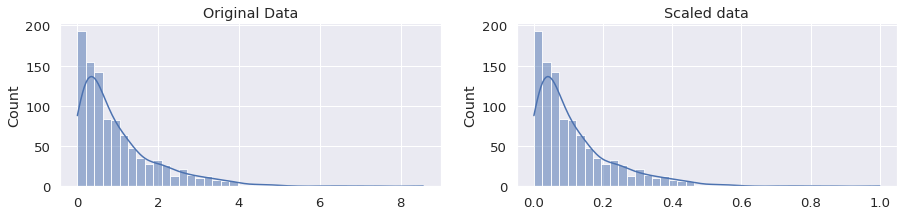

In [ ]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()


**Normalization**
Normalization changes the shape of the distribution of the data by making it more symmetrical. For example, if you have a data set with a skewed distribution, you could normalize it so that it has a normal distribution.

**Normal distribution:** Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

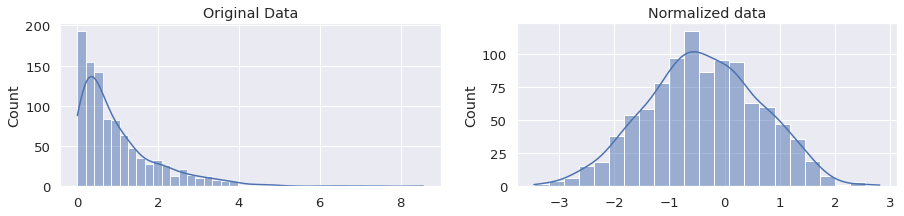

In [ ]:
# normalize the exponential data with boxcox

normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

Box-Cox transformation is a statistical technique that transforms your target variable so that your data closely resembles a normal distribution

**When to use scaling and normalization**

You would use scaling when you want to compare data that is on different scales. For example, if you have data about the heights of people in different countries, you could scale the data so that the heights are all measured in centimeters. Further, you want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN). With these algorithms, a change of "1" in any numeric feature is given the same importance.

You would use normalization when you want to compare data that has different distributions. For example, if you have data about the salaries of people in different companies, you could normalize the data so that the salaries are all expressed as a percentage of the average salary. Additionally, you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

**Advantages and disadvantages of scaling and normalization**

The main advantage of scaling is that it makes it easier to compare data that is on different scales. The main disadvantage of scaling is that it can lose information about the original values.

The main advantage of normalization is that it makes it easier to compare data that has different distributions. The main disadvantage of normalization is that it can be difficult to choose the right normalization method.



**One-Hot Encoding:** This pattern involves converting categorical variables into a numerical representation that can be used in machine learning algorithms. This is typically done by creating a binary indicator variable for each possible value of the categorical variable.

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# create a sample dataframe with a categorical variable
df = pd.DataFrame({
    'color': ['red', 'green', 'blue', 'green', 'red']
})
# instantiate OneHotEncoder
encoder = OneHotEncoder()

# fit the encoder on the data
encoder.fit(df[['color']])
# transform the data using the encoder
encoded_data = encoder.transform(df[['color']]).toarray()

In [ ]:
encoded_data

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

**The problem**
Machine learning models look for patterns in data to learn how the input features are related to the output labels. The quality of the final model depends heavily on the data representation of the input features. While handling structured, numeric input is relatively simple, the data required to train a machine learning model can take many forms, such as categorical features, text, images, audio, time series, and more.

For these data representations, we need a meaningful numeric value to supply our machine learning model so these features can fit within the typical training paradigm. Embeddings provide a way to handle some of these disparate data types in a way that preserves similarity between items and thus improves our model’s ability to learn those essential patterns.

Embeddings are a way of representing data as a vector of numbers. The size of the vector is determined by the number of features in the data. Each feature is represented by a single number in the vector. The values in the vector are learned by the machine learning model during training.


**Solution**

**Embeddings:**
This pattern involves representing high-dimensional categorical variables as low-dimensional vectors. This is often used for natural language processing tasks, where each word in a text corpus is represented as a vector in a lower-dimensional space.



**Text**

Text is a natural setting where embedding layers are advantageous. Given the large vocabulary of tens of thousands of words, one-hot encoding each word is not feasible. This would create a very large and sparse matrix for training. Also, we want similar words to have embeddings close by and unrelated words to be far away in embedding space. Therefore, we use a dense word embedding to vectorize the discrete text input before passing to our model.






11 (11, 512)


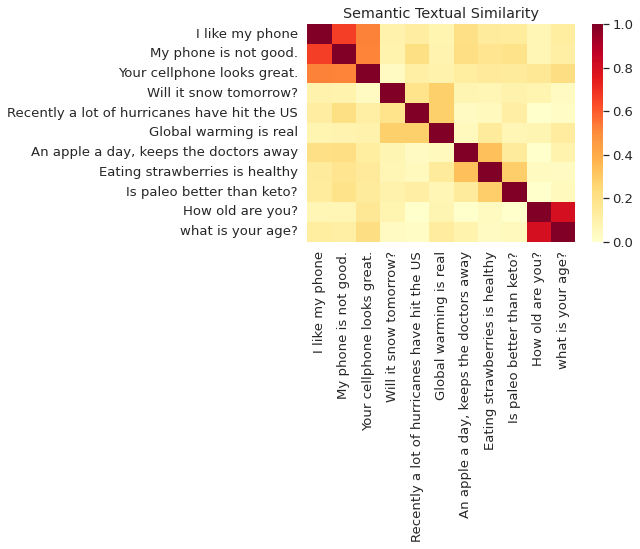

In [ ]:
import tensorflow_hub as hub
from absl import logging
import seaborn as sns
import numpy as np

embedding_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
def text_embedding(input):
  return embedding_model(input)

def plot_similarity(labels, features, rotation):
  #  np.inner is a commonly used function in Python for computing the similarity between vectors. 
  # It computes the dot product, if the dot product is positive, 
  # the vectors are pointing in similar directions. 
  # If it is negative, they are pointing in opposite directions. 
  #If it is zero, they are orthogonal (perpendicular) to each other.
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = text_embedding(messages_)
  print(len(messages_), message_embeddings_.shape)
  plot_similarity(messages_, message_embeddings_, 90)


messages = [
    # Smartphones
    "I like my phone",
    "My phone is not good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)

Images:

In [ ]:
import tensorflow as tf
from pathlib import Path
from tensorflow.keras.applications import InceptionV3
# load a pre-trained VGG16 model

def image_embedding(image_path, embedding_model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = tf.keras.applications.inception_v3.preprocess_input(x)
    x = tf.expand_dims(x, axis=0)
    features = embedding_model.predict(x)
    return features.flatten()


images = [
    # cats
    "https://static01.nyt.com/images/2021/09/14/science/07CAT-STRIPES/07CAT-STRIPES-mediumSquareAt3X-v2.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg",

    # dogs
    "https://ggsc.s3.amazonaws.com/images/uploads/The_Science-Backed_Benefits_of_Being_a_Dog_Owner.jpg",
    "https://cdn.britannica.com/16/234216-050-C66F8665/beagle-hound-dog.jpg"
]



embedding_model = InceptionV3(weights='imagenet', include_top=False)
def get_embeddings(images):
    
    images_embeddings = {}

    for image_uri in images:
        file_name = Path(image_uri).name
        image_path = tf.keras.utils.get_file(file_name,image_uri)

        label = file_name
        image_embeddings = image_embedding(image_path,embedding_model)        
        images_embeddings[label] = image_embeddings

    return images_embeddings
        
images_embeddings = get_embeddings(images)

1/1 [==============================] - 0s 42ms/step


In [ ]:
images_embeddings["1200px-Cat03.jpg"]

array([0.        , 0.5321001 , 0.06871171, ..., 3.0867412 , 2.815391  ,
       2.3659034 ], dtype=float32)

In [ ]:
images_embeddings.keys()

dict_keys(['07CAT-STRIPES-mediumSquareAt3X-v2.jpg', '1200px-Cat03.jpg', 'The_Science-Backed_Benefits_of_Being_a_Dog_Owner.jpg', 'beagle-hound-dog.jpg'])

In [ ]:
embedding1 = images_embeddings["1200px-Cat03.jpg"]
embedding2 = images_embeddings["07CAT-STRIPES-mediumSquareAt3X-v2.jpg"]
similarity = np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))
print(similarity)

0.4934445


In [ ]:
embedding1 = images_embeddings["1200px-Cat03.jpg"]
embedding2 = images_embeddings["The_Science-Backed_Benefits_of_Being_a_Dog_Owner.jpg"]
similarity = np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))
print(similarity)

0.23974058


**Why It Works**

The embedding layer is just another hidden layer of the neural network. The weights are then associated to each of the high-cardinality dimensions, and the output is passed through the rest of the network. Therefore, the weights to create the embedding are learned through the process of gradient descent just like any other weights in the neural network. This means that the resulting vector embeddings represent the most efficient low-dimensional representation of those feature values with respect to the learning task.

# Multimodal Input

**Problem**

Typically, an input to a model can be represented as a number or as a category, an image, or free-form text. Many off-the-shelf models are defined for specific types of input only—a standard image classification model such as Resnet-50, for example, does not have the ability to handle inputs other than images.

To understand the need for multimodal inputs, let’s say we’ve got a camera capturing footage at an intersection to identify traffic violations. We want our model to handle both image data (camera footage) and some metadata about when the image was captured (time of day, day of week, weather, etc.), as depicted in the next picture:

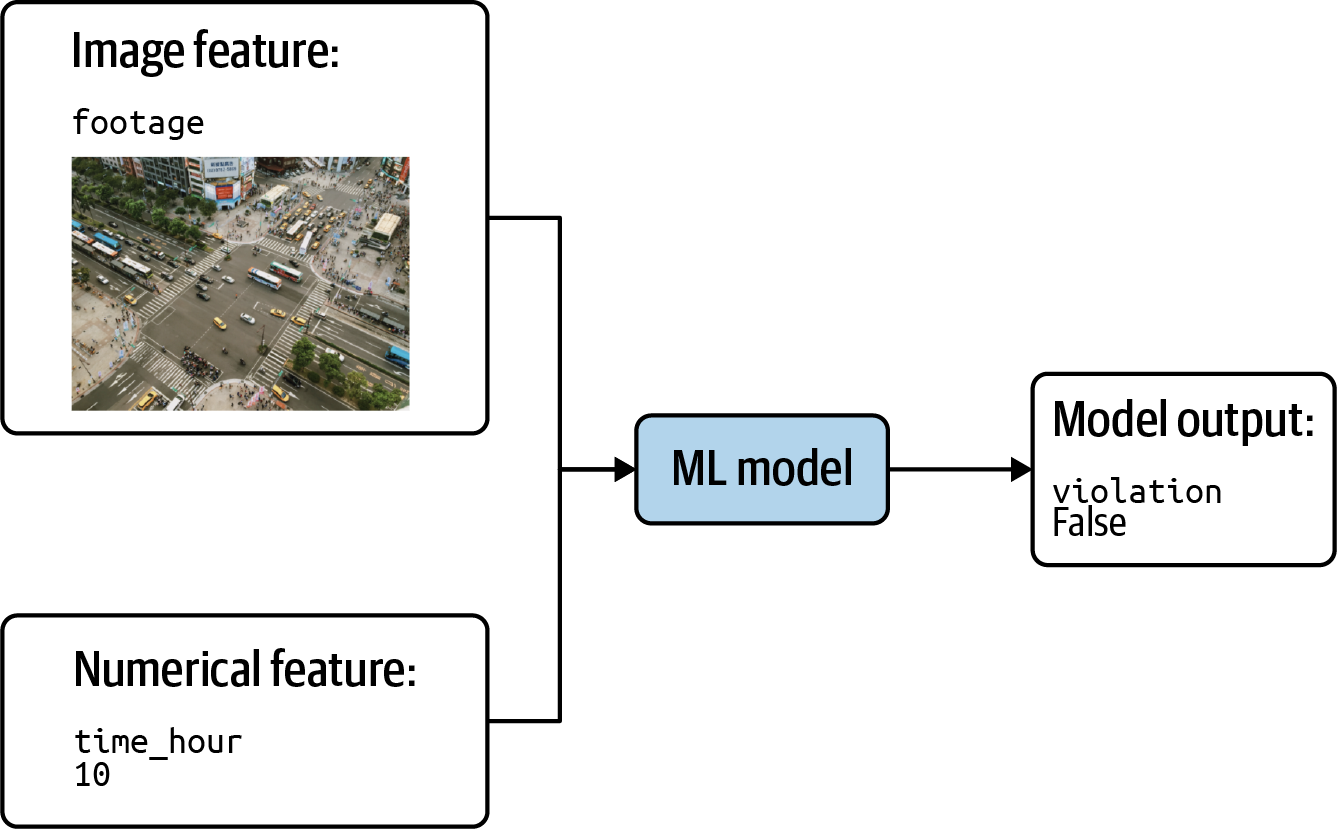

In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/keras-multi-input/keras-multi-input.zip
!unzip -qq keras-multi-input.zip
%cd keras-multi-input

--2023-03-22 02:22:25--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/keras-multi-input/keras-multi-input.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 3.5.78.17, 52.92.165.170, 52.218.176.9, ...
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|3.5.78.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4901 (4.8K) [binary/octet-stream]
Saving to: ‘keras-multi-input.zip’

keras-multi-input.z 100%[===================>]   4.79K  --.-KB/s    in 0s      

2023-03-22 02:22:25 (100 MB/s) - ‘keras-multi-input.zip’ saved [4901/4901]

/content/keras-multi-input/keras-multi-input


In [ ]:
!git clone https://github.com/emanhamed/Houses-dataset

Cloning into 'Houses-dataset'...
remote: Enumerating objects: 2166, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 2166 (delta 0), reused 0 (delta 0), pack-reused 2165
Receiving objects: 100% (2166/2166), 176.26 MiB | 41.13 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [ ]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import concatenate
import pandas as pd
import numpy as np
import argparse
import locale
import glob
import cv2
import os

In [ ]:
def load_house_attributes(inputPath):
	# initialize the list of column names in the CSV file and then
	# load it using Pandas
	cols = ["bedrooms", "bathrooms", "area", "zipcode", "price"]
	df = pd.read_csv(inputPath, sep=" ", header=None, names=cols)
	
    # determine (1) the unique zip codes and (2) the number of data
	# points with each zip code
	zipcodes = df["zipcode"].value_counts().keys().tolist()
	counts = df["zipcode"].value_counts().tolist()
	
    # loop over each of the unique zip codes and their corresponding
	# count
	for (zipcode, count) in zip(zipcodes, counts):
		# the zip code counts for our housing dataset is *extremely*
		# unbalanced (some only having 1 or 2 houses per zip code)
		# so let's sanitize our data by removing any houses with less
		# than 25 houses per zip code
		if count < 25:
			idxs = df[df["zipcode"] == zipcode].index
			df.drop(idxs, inplace=True)
	
    # return the data frame
	return df

In [ ]:
def process_house_attributes(df, train, test):
	# initialize the column names of the continuous data
	continuous = ["bedrooms", "bathrooms", "area"]
	
    # performin min-max scaling each continuous feature column to
	# the range [0, 1]
	cs = MinMaxScaler()
	trainContinuous = cs.fit_transform(train[continuous])
	testContinuous = cs.transform(test[continuous])
	
    # one-hot encode the zip code categorical data (by definition of
	# one-hot encoding, all output features are now in the range [0, 1])
	zipBinarizer = LabelBinarizer().fit(df["zipcode"])
	trainCategorical = zipBinarizer.transform(train["zipcode"])
	testCategorical = zipBinarizer.transform(test["zipcode"])
	
    # construct our training and testing data points by concatenating
	# the categorical features with the continuous features
	trainX = np.hstack([trainCategorical, trainContinuous])
	testX = np.hstack([testCategorical, testContinuous])
	
    # return the concatenated training and testing data
	return (trainX, testX)

In [ ]:
def load_house_images(df, inputPath):
	# initialize our images array (i.e., the house images themselves)
	images = []

	# loop over the indexes of the houses
	for i in df.index.values:
		# find the four images for the house and sort the file paths,
		# ensuring the four are always in the *same order*
		basePath = os.path.sep.join([inputPath, "{}_*".format(i + 1)])
		housePaths = sorted(list(glob.glob(basePath)))

		# initialize our list of input images along with the output image
		# after *combining* the four input images
		inputImages = []
		outputImage = np.zeros((64, 64, 3), dtype="uint8")

		# loop over the input house paths
		for housePath in housePaths:
			# load the input image, resize it to be 32 32, and then
			# update the list of input images
			image = cv2.imread(housePath)
			image = cv2.resize(image, (32, 32))
			inputImages.append(image)

		# tile the four input images in the output image such the first
		# image goes in the top-right corner, the second image in the
		# top-left corner, the third image in the bottom-right corner,
		# and the final image in the bottom-left corner
		outputImage[0:32, 0:32] = inputImages[0]
		outputImage[0:32, 32:64] = inputImages[1]
		outputImage[32:64, 32:64] = inputImages[2]
		outputImage[32:64, 0:32] = inputImages[3]

		# add the tiled image to our set of images the network will be
		# trained on
		images.append(outputImage)

	# return our set of images
	return np.array(images)

In [ ]:
def create_mlp(dim, regress=False):
	# define our MLP network
	model = Sequential()
	model.add(Dense(8, input_dim=dim, activation="relu"))
	model.add(Dense(4, activation="relu"))

	# check to see if the regression node should be added
	if regress:
		model.add(Dense(1, activation="linear"))

	# return our model
	return model

In [ ]:
def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
	# initialize the input shape and channel dimension, assuming
	# TensorFlow/channels-last ordering
	inputShape = (height, width, depth)
	chanDim = -1

	# define the model input
	inputs = Input(shape=inputShape)

	# loop over the number of filters
	for (i, f) in enumerate(filters):
		# if this is the first CONV layer then set the input
		# appropriately
		if i == 0:
			x = inputs

		# CONV => RELU => BN => POOL
		x = Conv2D(f, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(2, 2))(x)

	# flatten the volume, then FC => RELU => BN => DROPOUT
	x = Flatten()(x)
	x = Dense(16)(x)
	x = Activation("relu")(x)
	x = BatchNormalization(axis=chanDim)(x)
	x = Dropout(0.5)(x)

	# apply another FC layer, this one to match the number of nodes
	# coming out of the MLP
	x = Dense(4)(x)
	x = Activation("relu")(x)

	# check to see if the regression node should be added
	if regress:
		x = Dense(1, activation="linear")(x)

	# construct the CNN
	model = Model(inputs, x)

	# return the CNN
	return model

In [ ]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-d", "--dataset", type=str, required=True,
# 	help="path to input dataset of house images")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"dataset": "Houses-dataset/Houses Dataset",
}

In [ ]:
# construct the path to the input .txt file that contains information
# on each house in the dataset and then load the dataset
print("[INFO] loading house attributes...")
inputPath = os.path.sep.join([args["dataset"], "HousesInfo.txt"])
df = load_house_attributes(inputPath)

# load the house images and then scale the pixel intensities to the
# range [0, 1]
print("[INFO] loading house images...")
images = load_house_images(df, args["dataset"])
images = images / 255.0

[INFO] loading house attributes...
[INFO] loading house images...


In [ ]:
images.shape

(362, 64, 64, 3)

In [ ]:
df.shape

(362, 5)

In [ ]:
df.head()

,bedrooms,bathrooms,area,zipcode,price
30,5,3.0,2520,93446,789000
32,3,2.0,1802,93446,365000
39,3,3.0,2146,93446,455000
80,4,2.5,2464,91901,599000
81,2,2.0,1845,91901,529800


In [ ]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
print("[INFO] processing data...")
split = train_test_split(df, images, test_size=0.25, random_state=42)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split

# find the largest house price in the training set and use it to
# scale our house prices to the range [0, 1] (will lead to better
# training and convergence)
maxPrice = trainAttrX["price"].max()
trainY = trainAttrX["price"] / maxPrice
testY = testAttrX["price"] / maxPrice

# process the house attributes data by performing min-max scaling
# on continuous features, one-hot encoding on categorical features,
# and then finally concatenating them together
(trainAttrX, testAttrX) = process_house_attributes(df,
	trainAttrX, testAttrX)

[INFO] processing data...


In [ ]:
# create the MLP and CNN models
mlp = create_mlp(trainAttrX.shape[1], regress=False)
cnn = create_cnn(64, 64, 3, regress=False)

# create the input to our final set of layers as the *output* of both
# the MLP and CNN
# here we applied the multi-input pattern
combinedInput = concatenate([mlp.output, cnn.output])

# our final FC layer head will have two dense layers, the final one
# being our regression head
x = Dense(4, activation="relu")(combinedInput)
x = Dense(1, activation="linear")(x)

# our final model will accept categorical/numerical data on the MLP
# input and images on the CNN input, outputting a single value (the
# predicted price of the house)
model = Model(inputs=[mlp.input, cnn.input], outputs=x)

In [ ]:
# compile the model using mean absolute percentage error as our loss,
# implying that we seek to minimize the absolute percentage difference
# between our price *predictions* and the *actual prices*
opt = Adam(learning_rate=1e-3)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)

# train the model
print("[INFO] training model...")
model.fit(
	x=[trainAttrX, trainImagesX], y=trainY,
	validation_data=([testAttrX, testImagesX], testY),
	epochs=200, batch_size=8)

# make predictions on the testing data
print("[INFO] predicting house prices...")
preds = model.predict([testAttrX, testImagesX])

[INFO] training model...
Epoch 1/200
34/34 [==============================] - 5s 28ms/step - loss: 903.1512 - val_loss: 72.3863
Epoch 2/200
34/34 [==============================] - 0s 8ms/step - loss: 362.9267 - val_loss: 59.2315
Epoch 3/200
34/34 [==============================] - 0s 9ms/step - loss: 234.1859 - val_loss: 53.6101
Epoch 4/200
34/34 [==============================] - 0s 9ms/step - loss: 205.1098 - val_loss: 52.1894
Epoch 5/200
34/34 [==============================] - 0s 9ms/step - loss: 151.0823 - val_loss: 48.9005
Epoch 6/200
34/34 [==============================] - 0s 9ms/step - loss: 139.1077 - val_loss: 36.6894
Epoch 7/200
34/34 [==============================] - 0s 9ms/step - loss: 109.2565 - val_loss: 42.2415
Epoch 8/200
34/34 [==============================] - 0s 8ms/step - loss: 111.3851 - val_loss: 66.1424
Epoch 9/200
34/34 [==============================] - 0s 8ms/step - loss: 99.0311 - val_loss: 266.5977
Epoch 10/200
34/34 [==============================] - 0s

In [ ]:
# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)

# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

# finally, show some statistics on our model
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. house price: {}, std house price: {}".format(
	locale.currency(df["price"].mean(), grouping=True),
	locale.currency(df["price"].std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

[INFO] avg. house price: $533,388.27, std house price: $493,403.08
[INFO] mean: 23.74%, std: 22.18%
